In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmader/food41")

print("Path to dataset files:", path)

100%|██████████| 5.30G/5.30G [01:08<00:00, 83.6MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kmader/food41/versions/5


In [2]:
import pathlib
import os


In [3]:
os.walk(path)

<generator object _walk at 0x794e73f77610>

In [4]:
for dirpath, dirnames, filenames in os.walk(path):
    print(dirpath,dirnames,filenames)

    # Process each directory an

/root/.cache/kagglehub/datasets/kmader/food41/versions/5 ['meta', 'images'] ['food_c101_n10099_r64x64x3.h5', 'food_c101_n10099_r32x32x3.h5', 'food_test_c101_n1000_r64x64x3.h5', 'food_c101_n1000_r384x384x3.h5', 'food_test_c101_n1000_r64x64x1.h5', 'food_c101_n10099_r64x64x1.h5', 'food_test_c101_n1000_r128x128x1.h5', 'food_test_c101_n1000_r32x32x3.h5', 'food_c101_n10099_r32x32x1.h5', 'food_test_c101_n1000_r32x32x1.h5', 'food_test_c101_n1000_r128x128x3.h5']
/root/.cache/kagglehub/datasets/kmader/food41/versions/5/meta ['meta'] []
/root/.cache/kagglehub/datasets/kmader/food41/versions/5/meta/meta [] ['labels.txt', 'train.json', 'train.txt', 'classes.txt', 'test.txt', 'test.json']
/root/.cache/kagglehub/datasets/kmader/food41/versions/5/images ['crab_cakes', 'beef_tartare', 'french_toast', 'cannoli', 'spaghetti_carbonara', 'clam_chowder', 'chicken_curry', 'deviled_eggs', 'garlic_bread', 'steak', 'hot_and_sour_soup', 'beignets', 'guacamole', 'falafel', 'omelette', 'fried_rice', 'tacos', 'eggs

In [5]:
path

'/root/.cache/kagglehub/datasets/kmader/food41/versions/5'

In [6]:
os.listdir(path)

['food_c101_n10099_r64x64x3.h5',
 'food_c101_n10099_r32x32x3.h5',
 'food_test_c101_n1000_r64x64x3.h5',
 'meta',
 'food_c101_n1000_r384x384x3.h5',
 'food_test_c101_n1000_r64x64x1.h5',
 'food_c101_n10099_r64x64x1.h5',
 'images',
 'food_test_c101_n1000_r128x128x1.h5',
 'food_test_c101_n1000_r32x32x3.h5',
 'food_c101_n10099_r32x32x1.h5',
 'food_test_c101_n1000_r32x32x1.h5',
 'food_test_c101_n1000_r128x128x3.h5']

In [7]:
images_path = pathlib.Path(path,"images")

In [8]:
os.listdir(images_path)
import PIL

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image


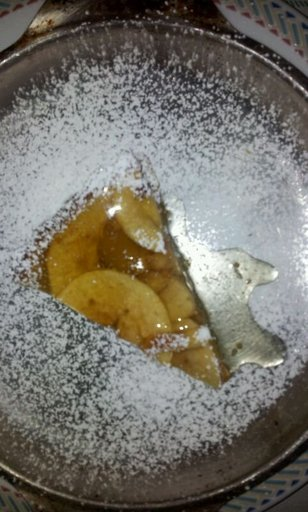

In [10]:
Image.open(f"{path}/images/apple_pie/1005649.jpg")

In [11]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms


In [12]:
my_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float),
])
""" transforms.Compose([
    transforms.CenterCrop(10),
    transforms.PILToTensor(),

]) """

' transforms.Compose([\n    transforms.CenterCrop(10),\n    transforms.PILToTensor(),\n    \n]) '

In [13]:
#load my data into datasets using ImageFolder from torchvision.datasets

my_datasets = datasets.ImageFolder(root=f"{path}/images",transform=my_transforms)

In [14]:
my_datasets.class_to_idx

len(my_datasets.classes)

101

In [15]:
img, label = my_datasets[0]

In [16]:
label

0

In [17]:
img.shape

torch.Size([3, 64, 64])

In [18]:
# turn my dataset to data loader

from torch.utils.data import DataLoader

In [19]:
my_data_new = DataLoader(my_datasets, batch_size=64, shuffle=True)

In [20]:
my_data_new

Feature batch shape: torch.Size([64, 3, 64, 64])
Labels batch shape: torch.Size([64])


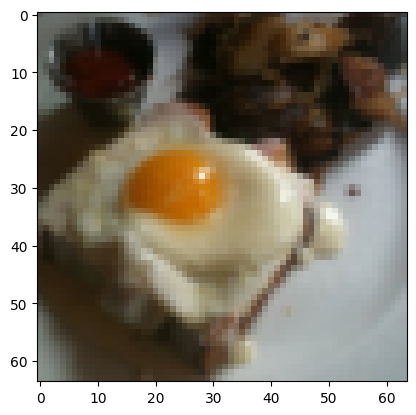

Label: 28


In [21]:
# Display image and label.
img, label = next(iter(my_data_new))
""" remember the {img} in this case is a batch not an image it is a group of images please dont forget that becauseit si confusion  """

print(f"Feature batch shape: {img.size()}")
print(f"Labels batch shape: {label.size()}")
img = img[0].squeeze()
label = label[0]
plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()
print(f"Label: {label}")

In [22]:
# train my first model
import torch
import torch.nn as nn
import torch.nn.functional as F

In [23]:

class FirstModel(nn.Module):
    def __init__(self, input_shape, hidden_layers=16, output_shape=101):
        super(FirstModel, self).__init__()

        # First convolutional block
        self.layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_layers, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),  # ReLU activation after first convolution
            nn.Conv2d(in_channels=hidden_layers, out_channels=hidden_layers*2, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),  # ReLU activation after second convolution
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )

        # Second convolutional block
        self.layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layers*2, out_channels=hidden_layers*4, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),  # ReLU activation after first convolution
            nn.Conv2d(in_channels=hidden_layers*4, out_channels=hidden_layers*2, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),  # ReLU activation after second convolution
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )

        # Fully connected classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*2*16*16, out_features=512),  # Linear layer
            nn.ReLU(),  # ReLU activation after fully connected layer
            nn.Linear(in_features=512, out_features=output_shape)  # Output layer
        )

    def forward(self, x):
        # Pass through the first block
        x = self.layer_1(x)

        # Pass through the second block
        x = self.layer_2(x)

        # Pass through the classifier (flatten + fully connected layers)
        x = self.classifier(x)

        return x


In [30]:

model = FirstModel(input_shape=3).to(device)

In [32]:
img, label = next(iter(my_data_new))
with torch.inference_mode():
    pred = model.forward(img.to(device))

In [33]:
pred

tensor([[-0.0110, -0.0360, -0.0137,  ...,  0.0058, -0.0085,  0.0100],
        [-0.0121, -0.0377, -0.0148,  ...,  0.0047, -0.0106,  0.0098],
        [-0.0069, -0.0369, -0.0166,  ...,  0.0026, -0.0128,  0.0085],
        ...,
        [-0.0113, -0.0370, -0.0138,  ...,  0.0030, -0.0097,  0.0077],
        [-0.0074, -0.0404, -0.0117,  ...,  0.0035, -0.0109,  0.0042],
        [-0.0106, -0.0369, -0.0139,  ...,  0.0032, -0.0100,  0.0074]],
       device='cuda:0')

In [34]:
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [35]:
loss_fn = nn.CrossEntropyLoss()

optimzer = optim.Adam(params=model.parameters(),lr=0.01)

Epoch [1/5] - Loss: 4.6245, Accuracy: 0.93%
Epoch [2/5] - Loss: 4.6187, Accuracy: 0.98%
Epoch [3/5] - Loss: 4.6188, Accuracy: 0.93%
Epoch [4/5] - Loss: 4.6187, Accuracy: 0.95%
Epoch [5/5] - Loss: 4.6188, Accuracy: 0.93%


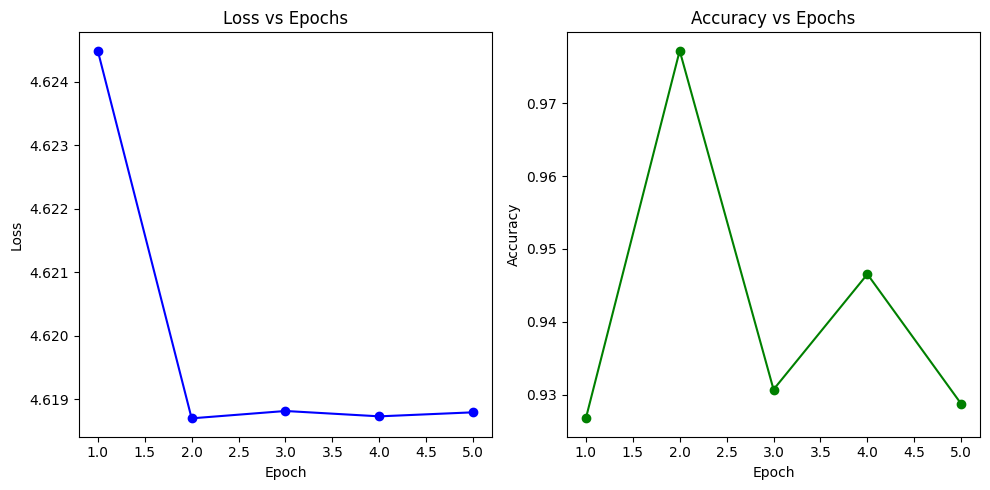

In [36]:
epochs = 5
epoch_list = []
loss_list = []
accuracy = []

# Set the model to training mode
model.train()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.01)

# Start the training loop
for epoch in range(epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for batch_idx, (X, y) in enumerate(my_data_new):  # Iterate over batches
        # Move data to device (GPU or CPU)
        X, y = X.to(device), y.to(device)

        # Zero the gradients for each batch
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X)

        # Compute the loss
        loss = loss_fn(outputs, y)

        # Backward pass (gradient computation)
        loss.backward()

        # Update model parameters
        optimizer.step()

        # Track the running loss
        running_loss += loss.item()

        # Apply softmax to get class probabilities
        probabilities = torch.softmax(outputs, dim=1)

        # Get the predicted class (class with the highest probability)
        _, predicted = torch.max(probabilities, 1)

        # Compute accuracy
        correct_predictions += (predicted == y).sum().item()
        total_predictions += y.size(0)

    # Compute the average loss and accuracy for the epoch
    avg_loss = running_loss / len(my_data_new)
    accuracy_epoch = (correct_predictions / total_predictions) * 100

    # Store the results for each epoch
    epoch_list.append(epoch + 1)
    loss_list.append(avg_loss)
    accuracy.append(accuracy_epoch)

    # Print the training progress for the epoch
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}, Accuracy: {accuracy_epoch:.2f}%")

# Optionally, plot the training curves for loss and accuracy if needed
import matplotlib.pyplot as plt

# Plot loss vs. epochs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epoch_list, loss_list, marker='o', color='b', label='Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot accuracy vs. epochs
plt.subplot(1, 2, 2)
plt.plot(epoch_list, accuracy, marker='o', color='g', label='Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

